In [1]:
import matplotlib.pyplot as ply
import numpy as np
import pandas as pd
import re

In [46]:
data = pd.read_table(
    'temp0.5.press0.1.rdf',skiprows=[0,1,2,3,4],
    delimiter=' ',names=['Row','c_1[1]','c_1[2]','c_1[3]'],index_col='Row')

In [47]:
data.head()

,c_1[1],c_1[2],c_1[3]
Row,,,
2,0.0375,0.0,0.0
3,0.0625,0.0,0.0
4,0.0875,0.0,0.0
5,0.1125,0.0,0.0
6,0.1375,0.0,0.0


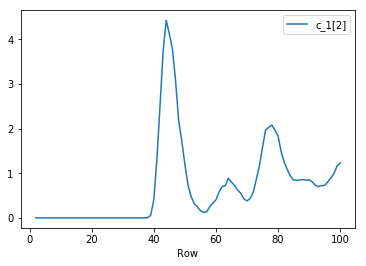

In [54]:
data.plot(y='c_1[2]')

In [58]:
data = pd.read_table('log.temp0.5.press0.1.file')

In [86]:
#застревает 
def read_line_special(path):
    with open(path,'r') as file:
        while file.readable():
            yield file.readline()

In [18]:
def read_line_special(file_object):
    while True:
        data = file_object.readline()
        if not data:
            break
        yield data

In [20]:
def parser(line):
    result = re.fullmatch('[\s|\d|\.|\-]+',line)
    if result:
        res = re.search('\d',result.string) # костыль
        if res:
            return result.string
        else:
            return None
    else:
        return None

In [217]:
path = 'log.temp0.5.press0.1.file'

auxiliary_file = 'help.txt'
help_file = open(auxiliary_file,'w') # костыль - не могу сразу передавать в DataFrame str. Использовать split и int?
help_file.write('0 0 0 0 0 0 0 0 0\n') # костыль - можно написать хэдр
with open(path,'r') as file:
    for line in read_line_special(file):
        line = parser(line)
        if line:
            line = re.sub('\s+',' ',line) # ? костыль
            line = line[1:-2] + '\n' # костыль
            help_file.write(line)
help_file.close()

In [33]:
path = 'log.temp0.5.press0.1.file'
names =['Step','PotEng','KinEng','TotEng','Temp','Press','Density', 'c_2[4]','c_3[4]']
n_data = pd.DataFrame(columns=names)
n_data.set_index('Step')

# Проблема в том, что у последних на два столбца больше
with open(path,'r') as file:
    for line in read_line_special(file):
        line = parser(line)
        if line:
            line = re.sub('\s+',' ',line) # ? костыль
            line = line[1:-2] + '\n' # костыль
            line = [float(i) for i in line.split()]
            #n_data = n_data.append(line)

In [11]:
names =['Step','PotEng','KinEng','TotEng','Temp','Press','Density', 'c_2[4]','c_3[4]']
data = pd.read_table('help.txt',header=None, delimiter=' '
                     ,index_col=0,names=names
                     ,error_bad_lines=False)[1:] 
# костыль 

In [36]:
data.describe()

,PotEng,KinEng,TotEng,Temp,Press,Density,c_2[4],c_3[4]
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,50.000000,50.000000
mean,-4960.929058,498.575481,-4462.353577,0.499825,0.090179,0.981850,0.028881,0.014159
std,20.407384,15.990564,25.279350,0.016031,0.357492,0.006523,0.002097,0.001724
min,-5023.776600,453.792980,-4527.727800,0.454930,-0.689646,0.963738,0.024957,0.010294
25%,-4974.293950,489.027345,-4481.461150,0.490253,-0.195507,0.977034,0.027639,0.012898
50%,-4961.973600,498.711380,-4463.850600,0.499961,0.117024,0.982113,0.028711,0.013844
75%,-4945.081000,508.450165,-4446.440300,0.509724,0.395862,0.987116,0.029956,0.015200
max,-4906.849100,537.815640,-4389.010400,0.539164,0.799701,0.997085,0.035945,0.018485
